# Previsão de Câncer de Mama a partir do dataset 'breast cancer wisconsin'.

#### **Objetivo**: criar um modelo preditivo que, dadas as características de exames de uma paciente, será capaz de classificar o tumor como Maligno ou Benigno, a partir do aprendizado obtido no treinamento do algoritmo.

#### Sobre o Dataset:
##### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


### Em construção ... ###

### Tópicos abordados:
Análise Exploratória (EDA)

Padronização

Normalização

Análise de Outliers

Balanceamento do dataset

Label Encoding

Treinamento do modelo

Cross validation

Como avaliar o modelo? 

* Confusion Matrix
* Classification Report
* Precision
* Recall
* f1_score 
* roc_auc_score

Encontrar probabilidade das classificações (predict_proba(X))

Tunning dos Hiperparâmetros

Feature Selection (escolha das variáveis mais relevantes)

### Workflow:

##### 1) Coleta dos dados
##### 2) EDA (Exploratory Data Analysis)
        distribuição das variáveis (normal/escala das variáveis)
        verificação de valores ausentes
        dados duplicados
##### 3) pré-processamento: ajuste de escala (padronização/normalização), distribuição das variáveis, verificação de outliers, balanceamento do dataset.        
##### 4) Feature Selection: verificação das variáveis mais relevantes para o modelo.
##### 5) Construção de diferentes modelos: split, treinamento, ajuste dos hiperparâmetros.
##### 6) Avaliação dos modelos: acurácia, confusion matrix, ROC, comparação dos diferentes algoritmos.        

# 1. Abordagem

#### Serão criados diferentes modelos de classificação (aprendizado supervisionado) com diferentes técnicas de pré-processamento e ajustes, a fim de encontrar aquele com melhor precisão.

#### A partir de dados históricos de pacientes, o algoritmo 'aprenderá' e conseguirá realizar previsões para novos pacientes indicando se o tumor em análise é Benigno ou Maligno. Trata-se de um classificador binário.

"Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Attribute Information**:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)
c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant"

### Importação das bibliotecas utilizadas

In [1]:
# Manipulação de dados

import pandas as pd
import numpy as np

# Visualização

import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('whitegrid')

# Pré-processamento

from sklearn.preprocessing import MinMaxScaler # Normalização / normalization
from sklearn.preprocessing import StandardScaler # Padronização / Standardization

# Split e fold/cross-validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Divisão em Folds para aplicação do CV 
from sklearn.model_selection import cross_val_score # Cross Validation

# Modelo

import sklearn
from sklearn.linear_model import LogisticRegression # Algoritmo de Classificação LR
from sklearn.neighbors import KNeighborsClassifier # Modelo de Classificação KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Métricas (avaliação do modelo: o quão bom/preciso ele é?)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# Outros

from IPython.display import Image
import warnings # Ignorar mensagens de 'alerta'
warnings.filterwarnings('ignore')

In [2]:
# Leitura do Dataset

df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head() # Visualização das primeiras linhas do dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2. Análise Exploratória do dataset

In [4]:
# Informações sobre 'tipagem' das colunas e valores ausentes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Resumo dos tipos das variáveis

pd.value_counts(df.dtypes)

float64    31
int64       1
object      1
dtype: int64

In [6]:
# Check quantidade de linhas/colunas
print('Formato do dataset (linhas, colunas): ', df.shape) # (linhas: 569,colunas: 33)

Formato do dataset (linhas, colunas):  (569, 33)


In [7]:
df['diagnosis'].head() # Variável alvo (target). Esta coluna indica se o tumor é Maligno ou Benigno.

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

#### Treinaremos o modelo com os dados históricos, para que ele aprenda e seja capaz de, a partir de um input (novos pacientes), gerar um output (prever a classificação do tumor). Como há a indicação da classificação do tumor ('diagnosis'), o modelo relacionará as várias características apresentadas no dataset (features/atributos) com o tipo de tumor.

In [8]:
# Primeiro, drop da coluna de índice 32, pois está vazia.

df = df.drop(df.columns[32], axis = 1)

In [9]:
# Check quantidade de linhas/colunas
print(df.shape) # (linhas: 569,colunas: 32)

(569, 32)


In [10]:
df.describe().T # Resumo estatístico do dataset 

# count: contagem

# mean: média

# std: desvio padrão

# min/max: valores mínimo e máximo

# 25%: primeiro quartil

# 50%: segundo quartil ou mediana

# 75%: terceiro quartil

# (apenas variáveis numéricas, veja que 'diagnosis' não aparece)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Balanceamento do dataset: tumores Malignos/Benignos

Possuir muitas mais classes que outras poderá afetar o modelo ? O ideal é que nossa distribuição, nesse caso binária, seja próxima de 50/50 %.

In [11]:
df['diagnosis'].value_counts() # 357 benignos e 212 malignos

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# Proporção em %

df['diagnosis'].value_counts(normalize = True) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

### Checando valores ausentes (missing values)

In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Verificação de dados duplicados


In [14]:
print('ids duplicados: ',df.duplicated(subset = ['id']).sum()) # Analisando apenas a coluna 'id'
print('registros duplicados no df: ', df.duplicated().sum()) # Avaliando todos os registros do Dataset

ids duplicados:  0
registros duplicados no df:  0


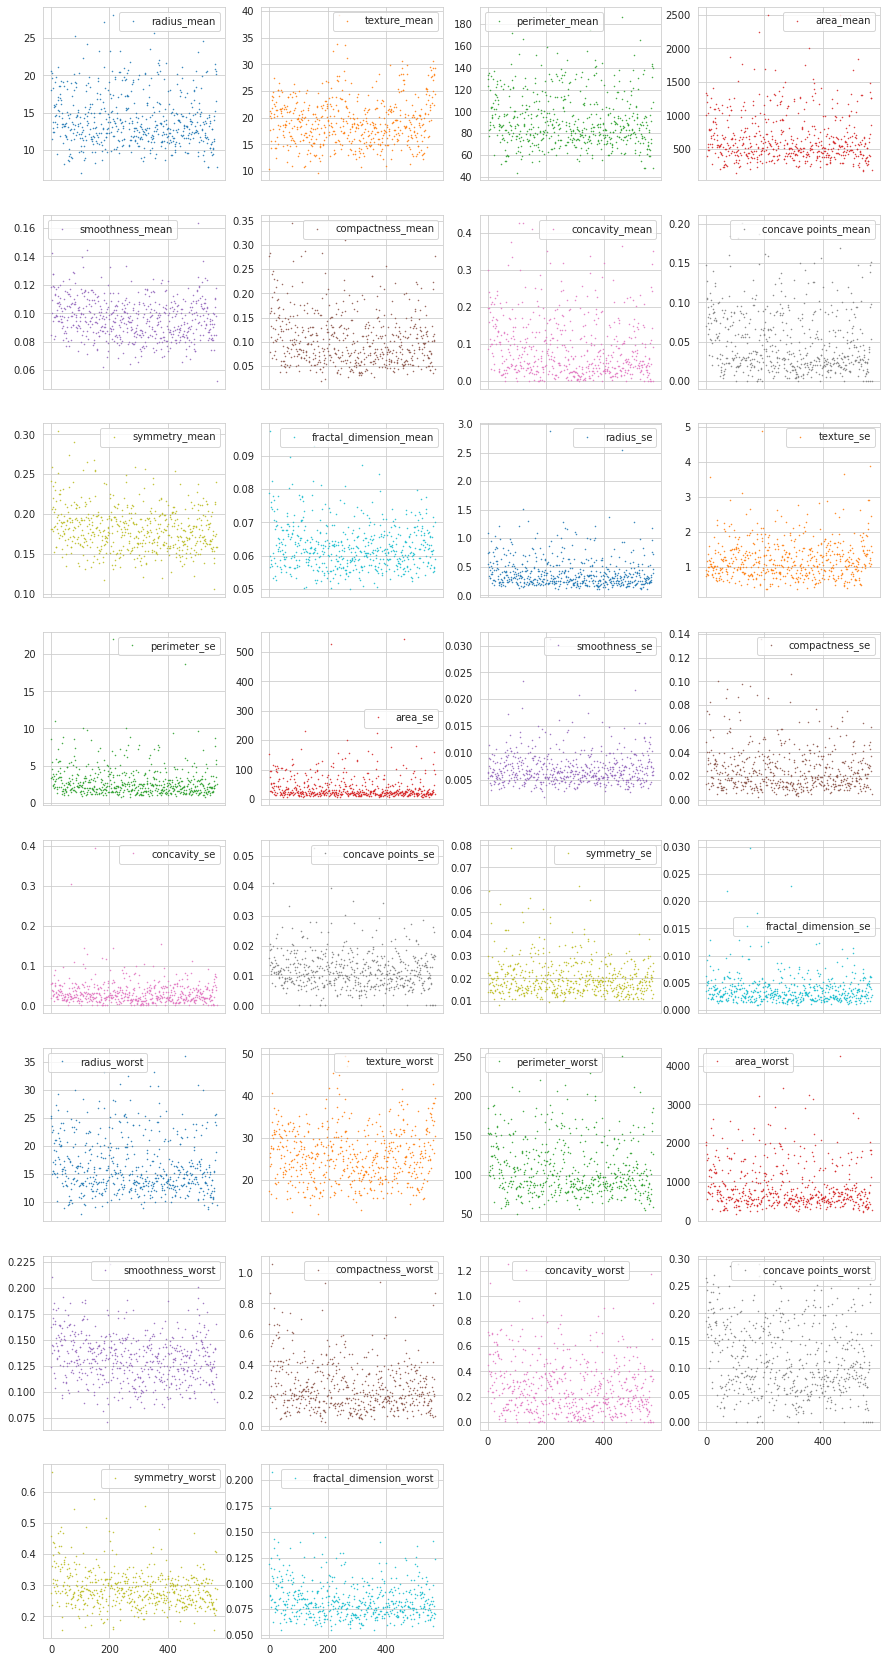

In [15]:
# Plot das variáveis

df.iloc[:,1:].plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

# Histograma: distribuição das variáveis

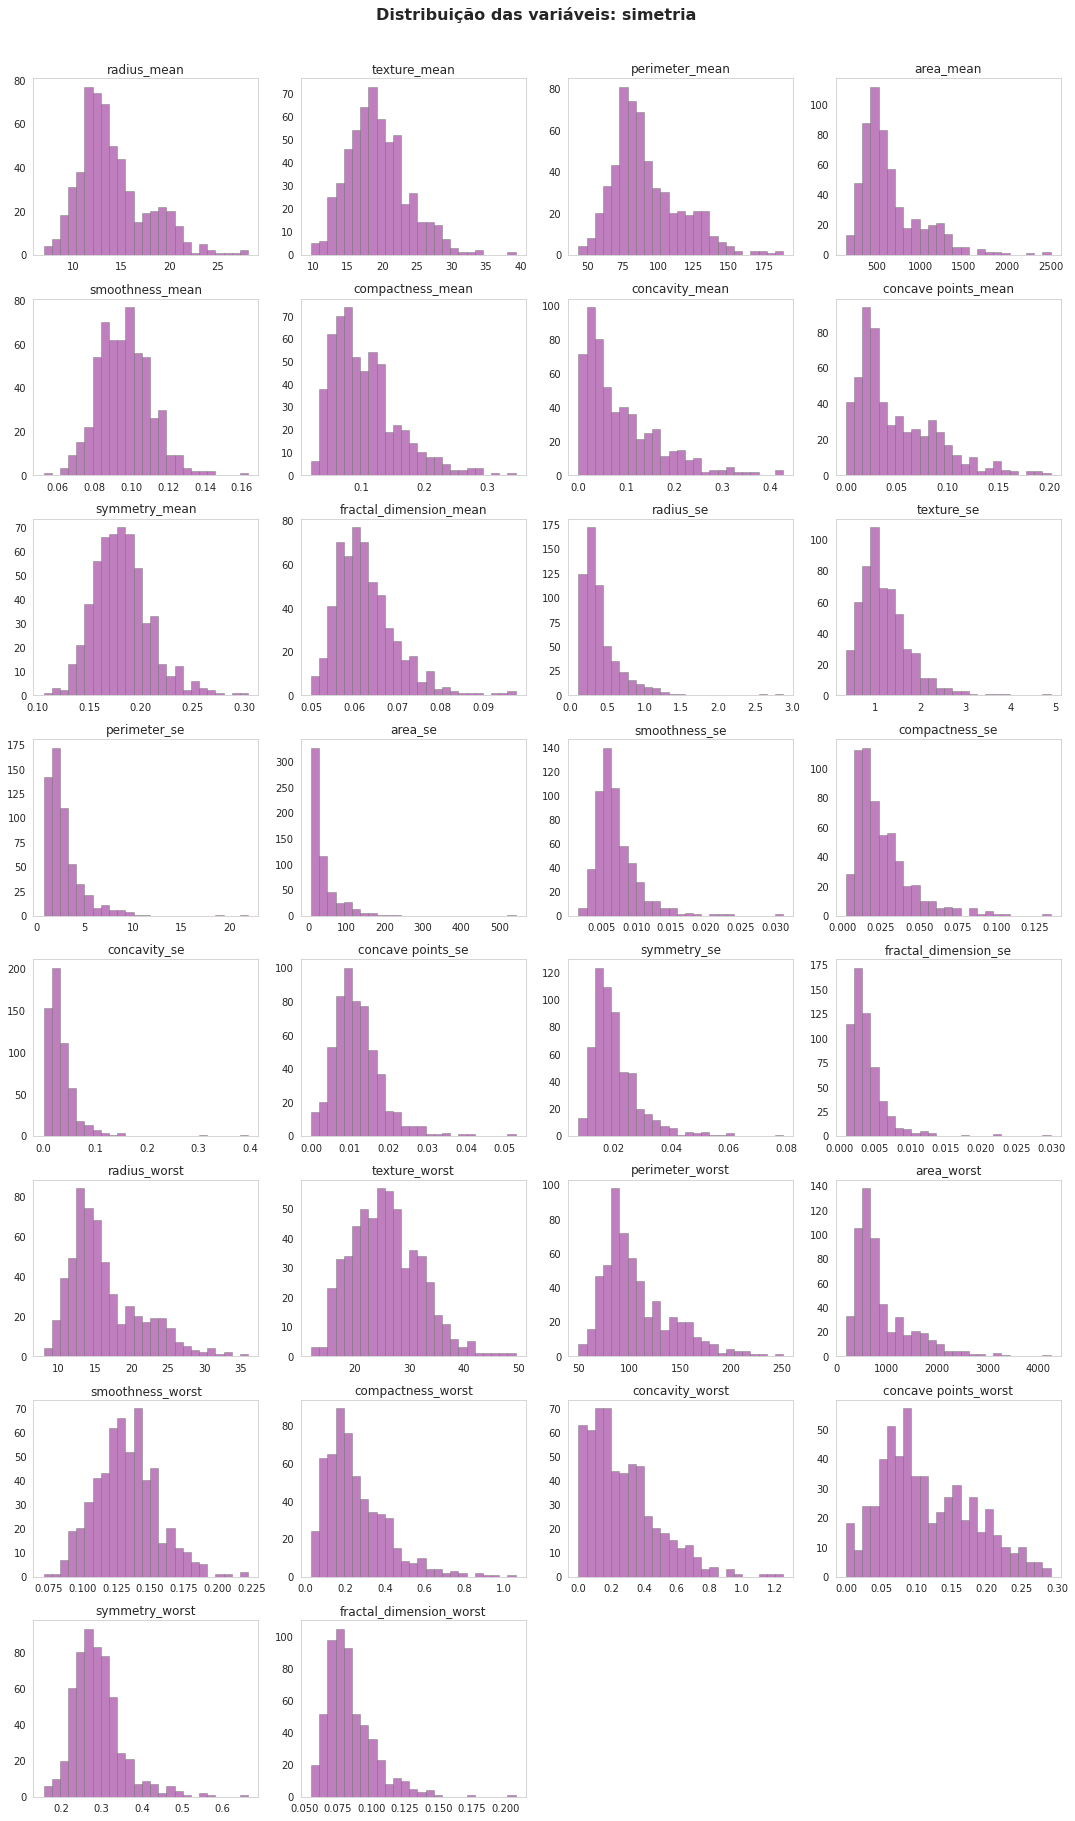

In [16]:
df.iloc[:,2:].hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="gray", color = 'purple', alpha = 0.5, grid = False)
plt.suptitle('Distribuição das variáveis: simetria', y = 1.01, fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### Assimetria/'skew' das variáveis: verificando a 'distribuição normal' das variáveis

Para dados normalmente distribuídos (gráfico em forma de sino), a skewness é próxima de zero. 

**Wikipedia**:

Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada

Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada

Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

https://pt.wikipedia.org/wiki/Assimetria_(estat%C3%ADstica)

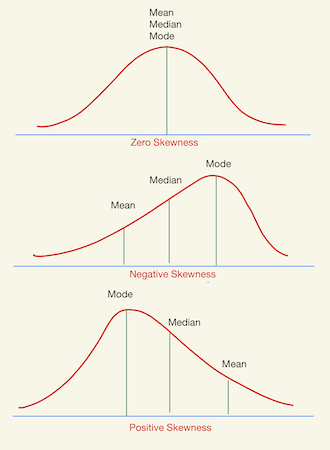

In [17]:
Image('https://study.com/cimages/multimages/16/img_91a4bcaa0b9b-15331990616072639890.jpeg', width = 500, height = 800)

In [18]:
# Verificando a 'skewness' das variáveis com o método skew() do Pandas.

df.iloc[:,1:].skew(axis = 0).sort_values(ascending = False)

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave points_worst       0

#### # Analisando os extremos graficamente


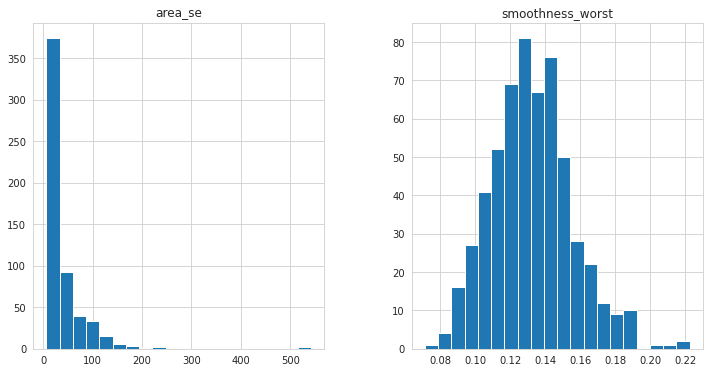

In [19]:
df[['area_se','smoothness_worst']].hist(figsize = (12,6), bins = 20)
plt.show()

# area_se: maior assimetria, cauda alongada à direita.
# smoothness_worst: assimetria próxima de zero, distribuição 'quase' normal (formato de sino).

#### Por que padronizar as variáveis?
A padronização é um requerimento para muitos modelos de Machine Learning, tornando-se uma etapa indispensável, em muitos casos, na etapa de pré-processamento. Primeiramente, será realizado o treinamento do modelo e verificada a sua acurácia. Depois, será realizada a padronização com a consequente comparação, avaliando se a etapa de pré-processamento aplicada contribuiu para a melhora do modelo preditivo.

z = (x - u) / s

Onde 'u' é a Média, que é igual a 0, s é o Desvio Padrão, que é igual a 1.

**scikit-learn**

"Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.

Read more in the User Guide."

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Verificando a correlação entre as variáveis graficamente

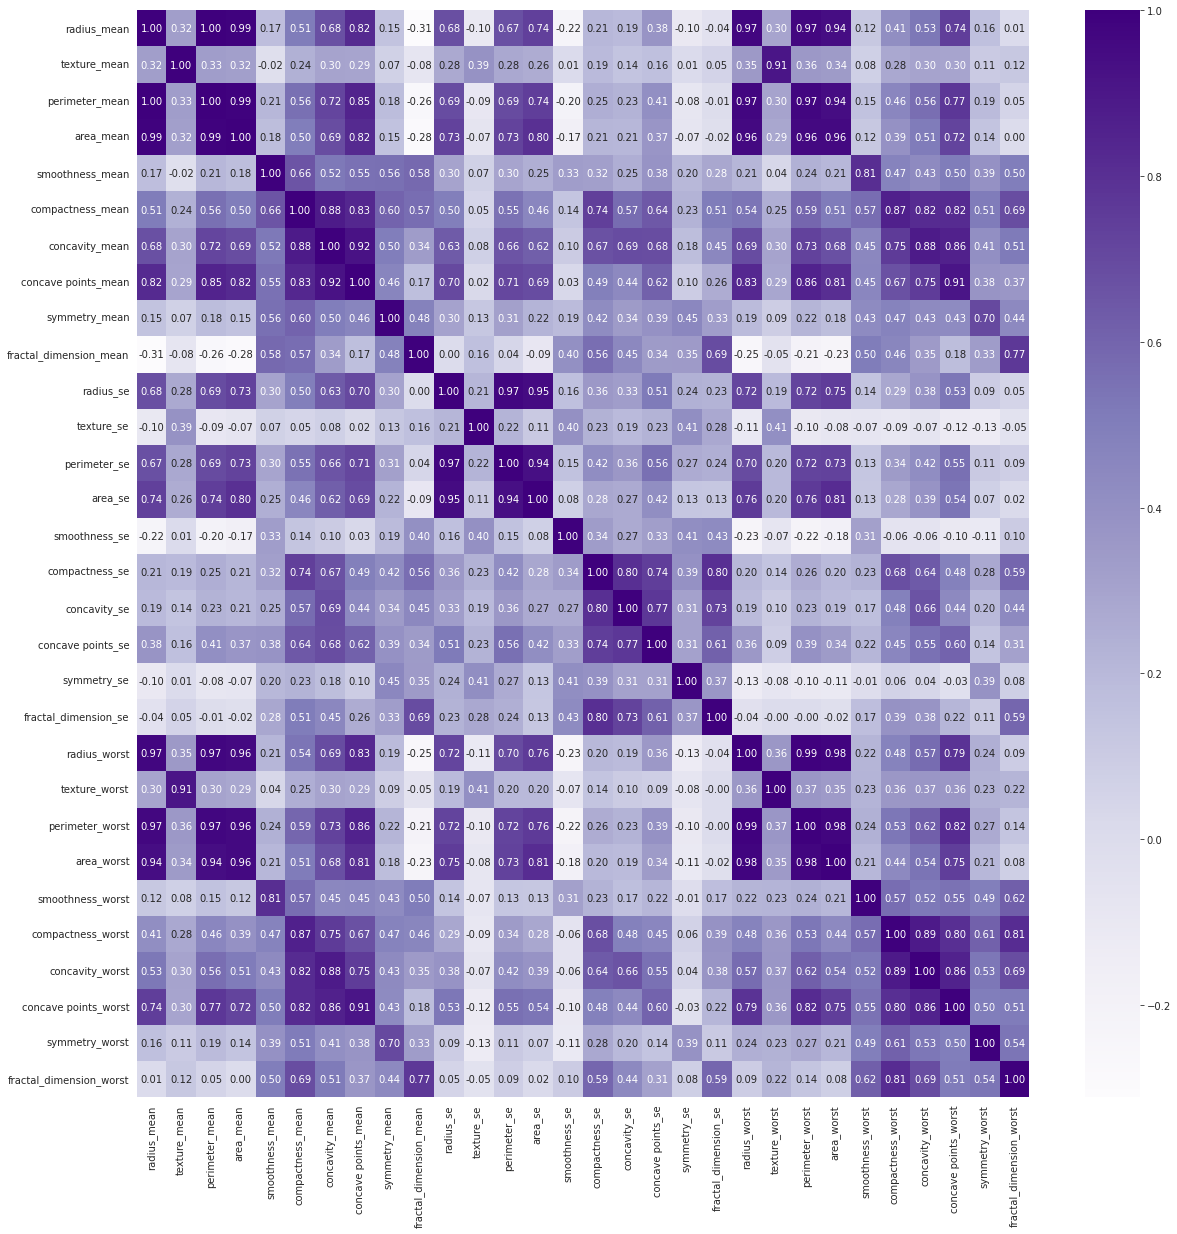

In [20]:
corr_mat = df.iloc[:,1:].corr()

# Plot
fig = plt.figure(figsize =(20,20))
sea.heatmap(data = corr_mat, cmap = 'Purples', annot = True, fmt = '.2f')
plt.show()

Como observado na matriz, existem algumas variáveis com correlação acima de 90% entre si.

### Analisando o desvio das variáveis: Desvio Padrão

In [21]:
df.iloc[:,2:].std(axis=0).sort_values(ascending = False) # Desvio padrão para cada coluna

area_worst                 569.356993
area_mean                  351.914129
area_se                     45.491006
perimeter_worst             33.602542
perimeter_mean              24.298981
texture_worst                6.146258
radius_worst                 4.833242
texture_mean                 4.301036
radius_mean                  3.524049
perimeter_se                 2.021855
texture_se                   0.551648
radius_se                    0.277313
concavity_worst              0.208624
compactness_worst            0.157336
concavity_mean               0.079720
concave points_worst         0.065732
symmetry_worst               0.061867
compactness_mean             0.052813
concave points_mean          0.038803
concavity_se                 0.030186
symmetry_mean                0.027414
smoothness_worst             0.022832
fractal_dimension_worst      0.018061
compactness_se               0.017908
smoothness_mean              0.014064
symmetry_se                  0.008266
fractal_dime

In [22]:
# Investigando mais de perto as variáveis com maior desvio padrão (standard deviation)

features = ['area_worst', 'area_mean']

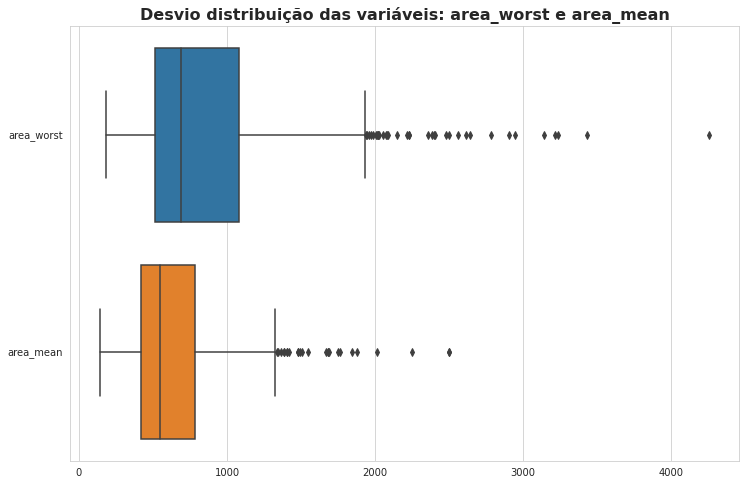

In [23]:
plt.figure(figsize = (12,8))
sea.boxplot(data = df[features], orient = 'h')
plt.title('Desvio distribuição das variáveis: area_worst e area_mean', fontdict = {'size':16, 'fontweight':'bold'})
plt.show()

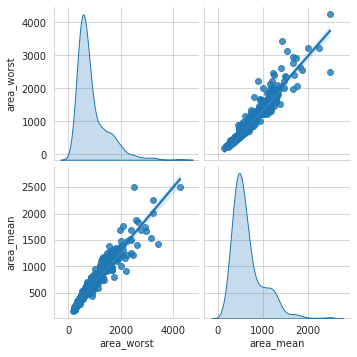

In [24]:
# pairplot

plt.rcParams["figure.figsize"] = (14,14)
sea.pairplot(df[features], diag_kind = 'kde', kind = 'reg')
plt.suptitle('')
plt.show()

### Detectar e remover Outliers

In [25]:
def remove_outlier(dataset, features):
    
    # Remover o outlier a partir do Z-score ( -3 < Z-score < 3)
    # Z-score = (X - mean)/std
    
    # Loop para calcular o z-score em cada coluna
    
    for feat in features:
            
        mean_feat = np.mean(dataset[feat])
        std_feat = np.std(dataset[feat])
        
        # Valor absoluto
        z_score = np.abs((dataset[feat] - mean_feat)/ std_feat)
        
        # Array booleano que 'salvará' o index dos registros outliers
        
        index_bool = np.array([True] * len(dataset))
        
        #Filtrando os valores com z-score entre -3 < z < 3 (|z| <= 3)
        index_bool = (z_score <= 3) & index_bool
               
        return index_bool        

In [26]:
# Invocando a função

index_outliers = remove_outlier(df, df.iloc[:,2:].columns) # passado o df sem as 2 primeiras colunas ('id' e 'diagnosis')

In [27]:
index_outliers[:5] # Primeiros 5 registros. True (não outliers) / False (outlier)

0    True
1    True
2    True
3    True
4    True
Name: radius_mean, dtype: bool

In [28]:
# Qtd de outliers

np.size(np.where(index_outliers == False)) 

5

In [29]:
# Filtrando o dataset com os registros considerados outliers

df[np.invert(index_outliers)] # 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


### LocalOutlierFactor

**Unsupervised Outlier Detection using the Local Outlier Factor (LOF).**

The anomaly score of each sample is called the Local Outlier Factor.
It measures the local deviation of the density of a given sample with respect
to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of its
neighbors, one can identify samples that have a substantially lower density
than their neighbors. These are considered outliers.


In [30]:
# Utilizaççao do pacote do scikit learn

from sklearn.neighbors import LocalOutlierFactor

In [31]:
LOF = LocalOutlierFactor()

In [32]:
out = LOF.fit_predict(df.iloc[:,2:]) # Deveria ser aplicado apenas ao conjunto de treinamento 
# Será realizado posteriormente

In [33]:
out[:10] # array com 1 (não outlier) e -1 (outlier)

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1])

In [34]:
# Index
np.where(out==-1)

(array([  3,   5,   9,  23,  24,  31,  38,  64,  82, 101, 122, 180, 193,
        202, 203, 212, 219, 236, 265, 275, 339, 352, 359, 368, 417, 461,
        503, 521, 539]),)

In [35]:
df.iloc[out == -1,:]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
23,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
24,852552,M,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,26.460,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
31,853612,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
38,855133,M,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
64,85922302,M,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,...,17.090,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382


##### Os modelos serão criados com os outliers. Posteriormente, eles serão removidos e os resultados comparados.

### Label Encoding

https://scikit-learn.org/stable/modules/preprocessing_targets.html#label-encoding

Como visto anteriormente, nossa variável alvo é do tipo 'object' (string). Transformaremos a variável target em sua representação numérica: 0 ou 1.

0 - Tumor Benigno
1 - Tumor Maligno

In [36]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [37]:
# DE PARA com a variável alvo

de_para_alvo = {'B':0, 'M':1}

df['diagnosis'] = df['diagnosis'].map(de_para_alvo)

df['diagnosis'].value_counts(normalize = True) * 100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

# Label Encoding x OneHot Encoding ?
#### Por que e quando aplicar esta etapa de pré-processamento

Esta etapa de pré-processamento será aplicada às variáveis categóricas, pois o nosso modelo espera apenas variáveis numéricas. A técnica a ser aplicada dependerá das características do conjunto de dados e do modelo aplicado. De maneira geral, existe uma 'regra geral' a ser seguida:


Aplicamaremos o Label Encoding quando:

•A variável categórica possui uma ordem natural (exemplo: variável 'escolaridade'. Esino fundamental, médio, superior ...)

Aplicaremos One-Hot Encoding quando:

•A variável categórica não é ordinal, ou seja, não há uma ordem. Exemplo: a variável cor (vermelho, amarelo ...)

**mais sobre o assunto:**
[https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/](http://)

[https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/](http://)

# 3. Preparação dos dados para construção do modelo

In [38]:
# Transformando o DataFrame do Pandas em Array

dataset = df.values
type(dataset)

numpy.ndarray

In [39]:

X = dataset[:,2:] # Features ( Excluindo as colunas 'id' e 'diagnosis')
y = dataset[:,1] # apenas a variável alvo/target 'diagnosis'

In [40]:
X.shape,y.shape # Shape dos arrays

((569, 30), (569,))

In [41]:
# Visualizando os Arrays

X[:5,] # Primeiros 5 registros

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [42]:
y[:5,] # Primeiros 5 registros

array([1., 1., 1., 1., 1.])

# 4. Modelos de Classificação (Aprendizagem Supervisionada)

### Regressão Logística

#### Versão 1

In [43]:
# Versão 1: com divisão em dados de treino e de teste (30 % dados de teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # Split dos dados

# Primeiramente, são utilizado os parâmatros 'default' do algoritmo.
LR_v1 = LogisticRegression() # Instanciado o objeto

LR_v1.fit(X_train, y_train) # Treinamento do modelo

LogisticRegression()

### checagem do balanceamento do dataset: dados de treino e de teste

In [44]:
# conjunto de treino
np.divide(np.unique(y_train,return_counts = True)[1], np.size(y_train)) * 100

array([62.56281407, 37.43718593])

In [45]:
# conjunto de teste
np.divide(np.unique(y_test,return_counts = True)[1], np.size(y_test)) * 100

array([63.15789474, 36.84210526])

Observa-se que a proporção é muito parecida com entre o dataset original e os labels de treino/teste.

#### Previsões com dados de teste

In [46]:
LR_v1_pred = LR_v1.predict(X_test)

LR_v1_pred[:5] # Slice no Array para exibir as primeiras 5 linhas

array([0., 1., 1., 0., 0.])

In [47]:
# Exibindo a previsão e o valor 'real' juntos:

dict_class = {'valor real':y_test, 'valor previsão': LR_v1_pred}
dataframe_class = pd.DataFrame(data = dict_class)

dataframe_class.sample(5) # Exibindo 5 Registros aleatórios

,valor real,valor previsão
36,1.0,1.0
168,0.0,0.0
157,0.0,0.0
109,0.0,0.0
164,1.0,1.0


### Probabilidade de classificação: predict_proba(X)

Esta função é utilizada para encontrar a probabilidade de predição para cada classe. **OBS**: A função não é encontrada em todos os algoritmos de Aprendizado de Máquina.


In [48]:
# Probabilidade da classificação para cada observação do registro

predict_proba_LR_v1 = LR_v1.predict_proba(X_test)

np.round(predict_proba_LR_v1[:8,:]*100, decimals = 2) # Slice para exibir as primeiras 8 linhas e todas as colunas

# Leitura: 

# 1° coluna: probabilidade de classificação como 0 (tumor Benigno)

# 2° coluna: probabilidade de classificação como 1 (tumor Maligno)

array([[ 87.04,  12.96],
       [  0.  , 100.  ],
       [  0.68,  99.32],
       [ 99.67,   0.33],
       [ 99.87,   0.13],
       [  0.  , 100.  ],
       [  0.  , 100.  ],
       [  0.45,  99.55]])

## Avaliando valor real (teste) x Previsão x Probabilidades da classificação

In [49]:
dataframe_LR_v1 = pd.DataFrame(
    data = {'Real':y_test, 
            'Previsão':LR_v1_pred, 
            'Prob Benigno': np.round(predict_proba_LR_v1[:,0]*100, decimals = 2),
            'Prob Maligno': np.round(predict_proba_LR_v1[:,1]*100, decimals = 2)
           })

In [50]:
# Amostra de 10 observações

dataframe_LR_v1.sample(10) 

,Real,Previsão,Prob Benigno,Prob Maligno
114,0.0,0.0,98.78,1.22
14,0.0,0.0,99.55,0.45
151,0.0,0.0,99.87,0.13
160,0.0,0.0,99.99,0.01
65,0.0,0.0,95.46,4.54
5,1.0,1.0,0.00,100.00
79,0.0,0.0,98.47,1.53
127,0.0,0.0,97.03,2.97
61,1.0,1.0,0.00,100.00
146,1.0,1.0,0.00,100.00


#### Avaliação da acurácia e outras métricas do modelo

In [51]:
LR_acuracia_v1 = accuracy_score(y_true = y_test, y_pred = LR_v1_pred) # Comparação entre os valores previstos x reais (nosso conjunto de teste/validação)

LR_acuracia_v1 * 100

# **Exemplo**: de 100 amostras, 90  foram 'classificadas' acertadamente pelo modelo. Logo, acurácia de 90%.

97.07602339181285

In [52]:
LR_v1.classes_ # Classes do modelo: 0 (Turmo Benigno) e 1 (tumor Maligno)

array([0., 1.])

### Classification Report


In [53]:
print(classification_report(y_true = y_test, y_pred = LR_v1_pred, target_names = ['Benigno', 'Maligno']))

              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.98       108
     Maligno       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



F1 score
Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 (precision recall) / (precision + recall) In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

Precisão: TP/(TP + FP)

Recall: TP/(TP + FN)

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect. Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

Precisão-Recall são úteis quando a avaliação de um modelo preditivo possui classes altamentes 'desbalanceadas', como é o exemplo em análise.

sklearn: In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

### Confusion Matrix: matriz de confusão

Evidencia os Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos. Quanto maiores os valores da diagonal principal (107 e 59) melhor, já os valores da diagonal secundária (4,1) , quanto menor, melhor, indicando que o modelo está errando menos nas previsões.

**TP (Verdadeiros Positivos/ True Positives)** = Tumores Benignos classificados corretamente como Tumores Benignos. **107**

**FP (Falsos Positivos/ False Negatives)** = Tumores Malignos classificados erroneamente como benignos. **4**

**TN (Verdadeiros Negativos/ True Negatives)** = Tumores Malignos corretamente classificados como Tumores Malignos. **59**

**FN (falsos negativos/ False Negatives)** = Tumores Benignos classificados erroneamente como Malignos. **1**

Precisão: TP/(TP + FP)

Recall: TP/(TP + FN)

In [54]:
confusion_matrix(y_true = y_test, y_pred = LR_v1_pred)

array([[107,   1],
       [  4,  59]])

### Analisando Graficamente com a ConfusionMatrix da scikit learn

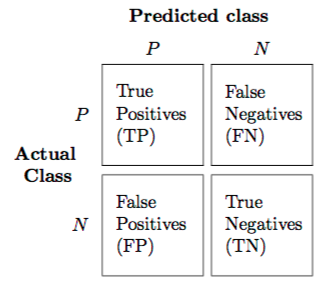

In [55]:
Image('http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png')

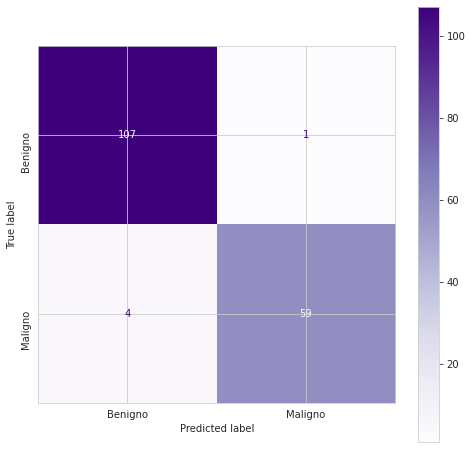

In [56]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams["figure.figsize"] = (8,8)
matrix = confusion_matrix(y_true = y_test, y_pred = LR_v1_pred)
matrix_plot = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benigno', 'Maligno'])
matrix_plot.plot(cmap = 'Purples')
plt.yticks(rotation = 90)
plt.show()

### F1 Score, Precision e Recall

### F1 Score

In [57]:
f1_score(y_true = y_test, y_pred = LR_v1_pred)

0.9593495934959351

### Roc auc score

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

Note: this implementation can be used with binary, multiclass and multilabel classification, but some restrictions apply (see Parameters).

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Receiver Operating Characteristic (ROC)¶
Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

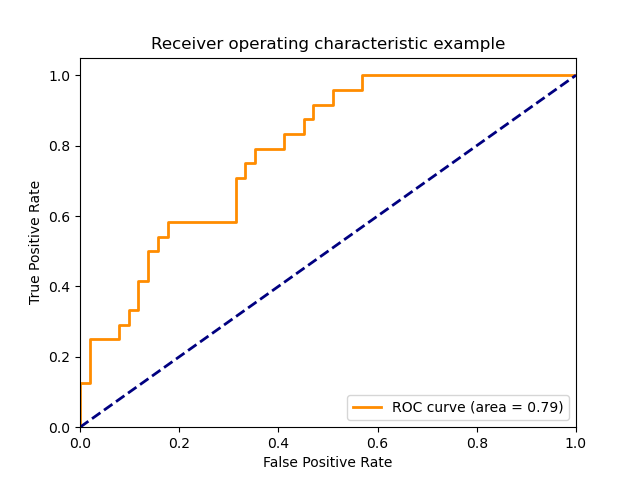

In [58]:
# Exemplo do plot da curva ROC

Image('https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png')

In [59]:
roc_auc_score(y_true = y_test, y_score= LR_v1.predict_proba(X_test)[:,1])

0.9966196355085244

#### Versão 2: cross validation

# Data Science Academy (DSA):

**Cross Validation** "é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). 

Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão. 

O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias."

In [60]:
kfold = 10 # Número de Folds 
seed = 42 # reproducibilidade

In [61]:
Image(url = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png', width = 600, height = 600)

#https://scikit-learn.org/stable/modules/cross_validation.html

### Tipos de 'scores' utilizados na Validação Cruzada

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [62]:
# Instanciando o modelo e separando os dados em KFolds para aplicação do Cross Validation

kf = KFold(n_splits = 10, shuffle = True, random_state = seed)

# n_splits : int, padrão = 5 Número de 'folds'. Deve ser no mínimo 5.
# random_state : para reproducibilidade.

LR_CV = cross_val_score(LogisticRegression(), X, y, cv = kf,scoring = 'roc_auc') # Treinamento do modelo e CV

# *Nota*: o próprio algoritmo recomenda aplicar um pré-processamento: 'scale'. A escala
# das features estão muito diferentes. O modelo será aperfeiçoado mais tarde e comparado 
# com esta versão.

In [63]:
# Avaliando o resultado do modelo:

print("AUC: %.3f" % (LR_CV.mean() * 100)) # 98,614 %

AUC: 98.614


#### KNeighborsClassifier: KNN V1

In [64]:
# Primeiramente, são utilizado os parâmatros 'default' do algoritmo.

KNN_v1 = KNeighborsClassifier()

In [65]:
# Treinamento do modelo

KNN_v1.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# Previsões dados de teste

KNN_v1_pred = KNN_v1.predict(X_test)

#### Avaliação da acurácia e outras métricas do modelo

In [67]:
### Acurácia

KNN_acuracia_v1 = accuracy_score(y_true = y_test, y_pred = KNN_v1_pred)
KNN_acuracia_v1

0.9590643274853801

In [68]:
# Classification Report

print(classification_report(y_true = y_test, y_pred = KNN_v1_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       108
         1.0       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [69]:
# Confusion Matrix

confusion_matrix(y_true = y_test, y_pred = KNN_v1_pred)

array([[107,   1],
       [  6,  57]])

In [70]:
# f1 score

f1_score(y_true = y_test, y_pred = KNN_v1_pred)

0.9421487603305785

In [71]:
# roc auc score

roc_auc_score(y_true = y_test, y_score= KNN_v1.predict_proba(X_test)[:,1])

0.995296884185773

### KNN V2: Cross Validation

In [72]:
# Transformando o DataFrame do Pandas em Array

dataset = df.values

X = dataset[:,2:]
y = dataset[:,1]

# Instanciando o modelo
KNN = KNeighborsClassifier() 

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

scores = cross_val_score(KNN, X, y, cv = kfold)

print(scores.mean()*100)

93.66541353383457


# 5. Pré-processamento: aplicando transformações
#### https://scikit-learn.org/stable/modules/preprocessing.html

•	 A classe **MinMaxScaler()** de sklearn.preprocessing é usada para **normalização** das variáveis.


•	 A classe **StandardScaler()** de sklearn.preprocessing é usada para **padronização** das variáveis.


### 5.1 MinMaxScaler (Normalização)

A normalização transformará os dados para a mesma escala. Por default, o Scale do MinMaxScaler é de [0,1].

##### Como primeiro teste, aplicaremos o MinMaxScaler como etapa de pré-processamento: todos os dados numéricos serão adequados a uma mesma escala (mesmo mínimo/máximo).

In [73]:
# Transformando o DataFrame do Pandas em Array

dataset = df.values

X = dataset[:,2:]
y = dataset[:,1]

In [74]:
# Split dos dados em treino/teste

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,random_state = 42)

In [75]:
##### Aplicando pré-processamento: o 'normalizador' é treinado com dados de treino. 

# A transformação será aplicada tanto aos dados de treino como de teste. Quando o modelo estiver em produção,
# será necessário aplicar a transformação antes de 'entregar' os dados ao modelo, pois ele foi
# treinado desta maneira.

MinMax_Scaler = MinMaxScaler()
X_train_Scaled = MinMax_Scaler.fit_transform(X_train) # Dados de treino

In [76]:
X_train_Scaled[0:5,:] # Amostra dos dados (variação de 0 a 1, default do MinMaxScaler())

array([[0.29624369, 0.27730808, 0.28381849, 0.1778941 , 0.16780652,
        0.15197589, 0.06750234, 0.06605368, 0.16337427, 0.12299916,
        0.0501539 , 0.12084702, 0.03844885, 0.02739644, 0.0060078 ,
        0.10265269, 0.04494949, 0.1103997 , 0.10093695, 0.03735334,
        0.24347635, 0.2782516 , 0.21707081, 0.12462783, 0.11563981,
        0.16388145, 0.17312375, 0.21839623, 0.15474078, 0.12800949],
       [0.27812332, 0.22590463, 0.26940639, 0.16437827, 0.08563782,
        0.18447367, 0.189597  , 0.13916501, 0.13614522, 0.1741786 ,
        0.01897519, 0.23725204, 0.02195731, 0.01467693, 0.11425359,
        0.22867786, 0.12517677, 0.19662815, 0.07835306, 0.10990423,
        0.20400556, 0.28598081, 0.19063596, 0.1013547 , 0.15493985,
        0.24212577, 0.36617224, 0.32576197, 0.09520993, 0.18006104],
       [0.34276899, 0.14440311, 0.355879  , 0.20840127, 0.40231936,
        0.56235874, 0.33973758, 0.31312127, 0.4906567 , 0.50758214,
        0.15741445, 0.35012778, 0.19026528, 0.

In [77]:
# Aplicação nos dados de teste
X_test_Scaled = MinMax_Scaler.transform(X_test)

In [78]:
# Criando o modelo de Regressão Logística

LR_MinMaxScaler = LogisticRegression()

In [79]:
# Treinando o modelo (apenas dados de treino)

LR_MinMaxScaler.fit(X_train_Scaled, Y_train)

LogisticRegression()

In [80]:
# Predições

res_LR_MinMaxScaler = LR_MinMaxScaler.predict(X_test_Scaled)

accuracy_score(y_true = Y_test, y_pred = res_LR_MinMaxScaler)

# A precisão foi inferior em comparação ao modelo sem a transformação (Scale)

0.9649122807017544

In [81]:
# Relatório de Classificação
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=confusion_matrix
# Fazendo as previsões e construindo o relatório

report = classification_report(y_true = Y_test, y_pred = res_LR_MinMaxScaler)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       108
         1.0       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [82]:
# Confusion Matrix

confusion_matrix(y_true = Y_test, y_pred = res_LR_MinMaxScaler)

array([[107,   1],
       [  5,  58]])

In [83]:
# f1_score

f1_score(y_true = Y_test, y_pred = res_LR_MinMaxScaler)

0.9508196721311476

### 5.2 StandardScaler (Padronização)

A padronização transformará a média da distribuição para 0 e o desvio padrão para 1.

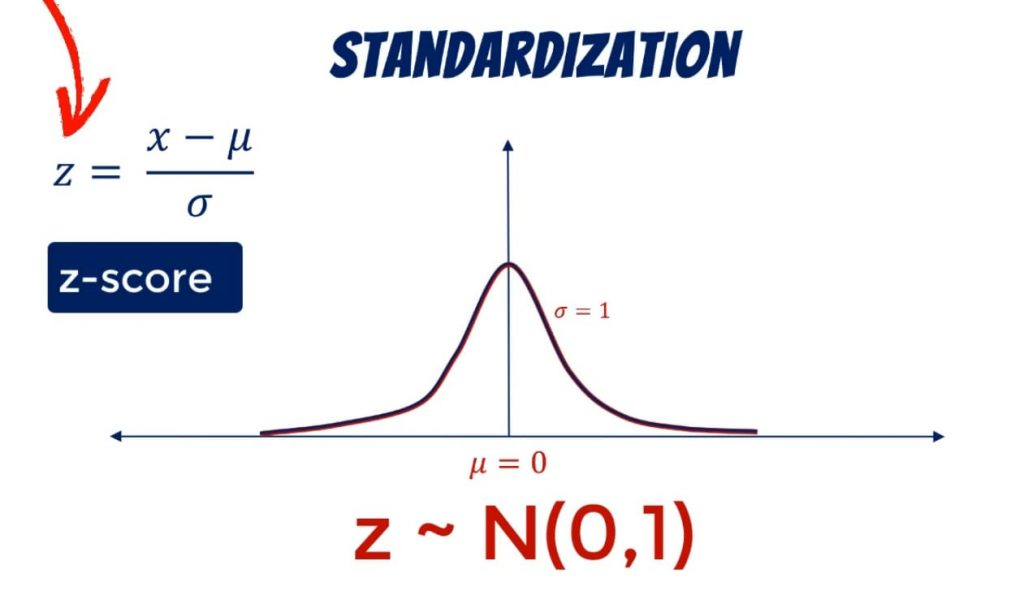

In [84]:
Image('https://365datascience.com/resources/blog/2018-10-image5-9-1024x591.jpg')

# https://365datascience.com/tutorials/statistics-tutorials/standardization/

In [85]:
# Aplicando o pré-processamento: StandardScaler

Std = StandardScaler()

In [86]:
# 'Padronizador' treinado (dados de treino somente)

X_train_std = Std.fit_transform(X_train)

In [87]:
np.mean(X_train_std) # Média próxima de zero ~ 0

-6.188981953019298e-16

In [88]:
np.std(X_train_std) # Desvio padrão = 1

1.0

In [89]:
# Aplicação aos dados de teste.

X_test_Std = Std.transform(X_test)

In [90]:
# Modelo

LR_Std = LogisticRegression()

In [91]:
# Treinamento do algoritmo

LR_Std.fit(X_train_std, y_train)

LogisticRegression()

In [92]:
# Predições

res_LR_Std = LR_Std.predict(X_test_Std)

accuracy_score(y_true = Y_test, y_pred = res_LR_Std)

# A precisão foi SUPERIOR em comparação ao modelo sem a transformação (standardization).

0.9824561403508771

# 6. Criando um Loop para treinar diversos algoritmos de uma vez

Utilizaremos os dados sem pré-processamentos.

In [93]:
# Criação de um objeto para salvar os modelos

modelos = []

In [94]:
modelos.append(('LR',LogisticRegression()))
modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('SVC', SVC())) # Suport Vector Classifier
modelos.append(('NB', GaussianNB()))
modelos.append(('SVC', SVC()))
modelos.append(('CART',DecisionTreeClassifier())) # Classification and Regression Trees

In [95]:
# Avaliando cada modelo em um Loop

modelo = []
resultado = []

for name, model in modelos:
    modelo.append(name) # Salvando o nome do modelo
    
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
    
    cv_result = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    
    resultado.append(cv_result) # gravando o resultado
    
    print('Média igual a {0:0.2f} e Desvio Padrão igual a {1:0.2f} para o modelo {2}'.format(cv_result.mean(),cv_result.std(), name))

Média igual a 0.94 e Desvio Padrão igual a 0.04 para o modelo LR
Média igual a 0.90 e Desvio Padrão igual a 0.04 para o modelo KNN
Média igual a 0.90 e Desvio Padrão igual a 0.04 para o modelo SVC
Média igual a 0.94 e Desvio Padrão igual a 0.04 para o modelo NB
Média igual a 0.90 e Desvio Padrão igual a 0.04 para o modelo SVC
Média igual a 0.89 e Desvio Padrão igual a 0.06 para o modelo CART


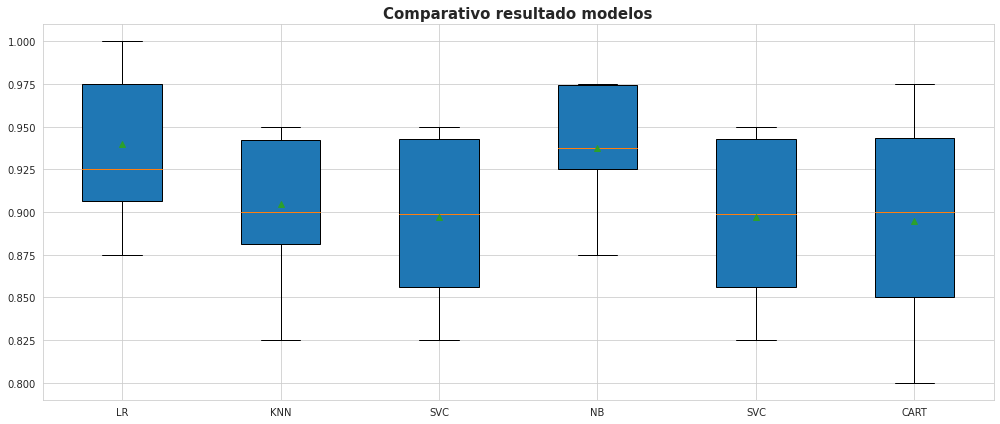

In [96]:
plt.figure(figsize = (14,6))
plt.boxplot(resultado, showmeans = True, patch_artist = True)
plt.title("Comparativo resultado modelos", fontdict = {'fontsize': 15, 'fontweight':'bold'})
plt.xticks(range(1,1+len(modelo)),modelo)
plt.tight_layout()
plt.show()

**K-Folds cross-validator**

Provides train/test indices to split data in train/test sets. Split
dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining
folds form the training set.

# 7. Feature Selection

Esta etapa consiste em selecionar as variáveis (features) que são 'mais impactantes' na acurácia do modelo. Nem sempre "quanto mais variáveis,melhor será o modelo". Atributos irrelevantes podem impactar negativamente o modelo. O Scikit-Learn possui ferramentas que nos auxiliam na automatização da seleção das características mais relevantes.

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

### 7.1 Select KBest

In [97]:
# Selecionando os 10 maiores scores

best_features = SelectKBest(score_func = chi2, k = 10)

In [98]:
# Treina o modelo

fit_best_features = best_features.fit(X_train, y_train)

In [99]:
# transforma o modelo selecionando apenas os 10 melhores recursos

feat = fit_best_features.transform(X_train)

In [100]:
feat.shape

(398, 10)

#### Método Ensemble para seleção de variáveis
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

"An **extra-trees classifier**.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

In [101]:
# Quanto maior o score, maior será a importância da variável

In [102]:
# Transformando o DataFrame do Pandas em Array

dataset = df.values

X = dataset[:,2:] # Exceção do 'id' e 'diagosis'
y = dataset[:,1] # Diagnosis (variável alvo)

In [103]:
# Criação e treinamento do modelo

modelo = ExtraTreesClassifier()
modelo.fit(X,y)

ExtraTreesClassifier()

In [104]:
# Print dos Resultados
print(df.columns[2:])
print(modelo.feature_importances_)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
[0.03500185 0.02161157 0.05747137 0.04447528 0.01346599 0.03298043
 0.07640319 0.09755992 0.00820147 0.00746019 0.02729484 0.0051509
 0.01700201 0.03361279 0.00516505 0.00834877 0.0069719  0.01078424
 0.00632919 0.00671293 0.07948483 0.02815892 0.07784521 0.10064024
 0.02281587 0.02772814 0.03691607 0.08064984 0.0161898  0.00756722]


In [105]:
scores_atributos = pd.DataFrame({"Atributo":df.columns[2:],"Score (%)":modelo.feature_importances_ * 100})
scores_atributos

,Atributo,Score (%)
0,radius_mean,3.500185
1,texture_mean,2.161157
2,perimeter_mean,5.747137
3,area_mean,4.447528
4,smoothness_mean,1.346599
5,compactness_mean,3.298043
6,concavity_mean,7.640319
7,concave points_mean,9.755992
8,symmetry_mean,0.820147
9,fractal_dimension_mean,0.746019


In [106]:
# Exibindo os TOP 5 scores
scores_atributos.sort_values(by = ['Score (%)'], ascending = False).head(5)

,Atributo,Score (%)
23,area_worst,10.064024
7,concave points_mean,9.755992
27,concave points_worst,8.064984
20,radius_worst,7.948483
22,perimeter_worst,7.784521


In [107]:
#### Em construção .......